### Import necessary libraries 

#### Desicion Tree

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

#### Importing data

In [3]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [4]:
df.shape

(5110, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
list(df.columns)

['id',
 'gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

##### Missing values 

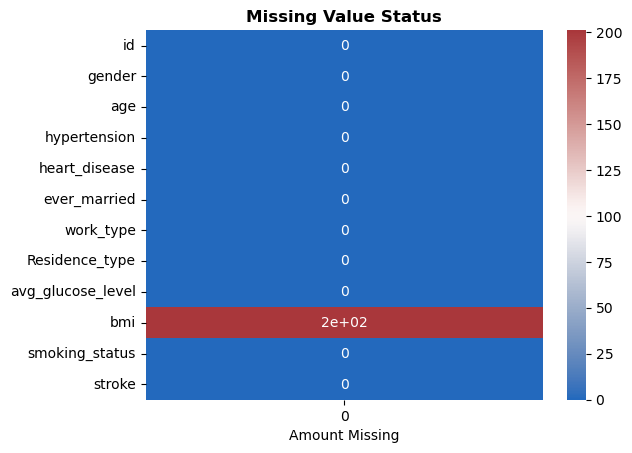

In [7]:
plt.title("Missing Value Status", fontweight="bold")
ax = sns.heatmap(df.isnull().sum().to_frame(), annot=True, cmap="vlag")
ax.set_xlabel("Amount Missing")
plt.show()

In [8]:
# df.fillna(df.mean(), inplace=True)
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB


##### EXPLORATORY DATA ANALYSIS

In [10]:
gender_count = df.groupby("gender")["gender"].count()

hypertension_count = df.groupby("hypertension")["hypertension"].count()

heart_disease = df.groupby("heart_disease")["heart_disease"].count()

gender_count, hypertension_count, heart_disease

(gender
 Female    2897
 Male      2011
 Other        1
 Name: gender, dtype: int64,
 hypertension
 0    4458
 1     451
 Name: hypertension, dtype: int64,
 heart_disease
 0    4666
 1     243
 Name: heart_disease, dtype: int64)

/tmp/ipykernel_9002/4091129708.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  feature_corr = sns.heatmap(df.corr())


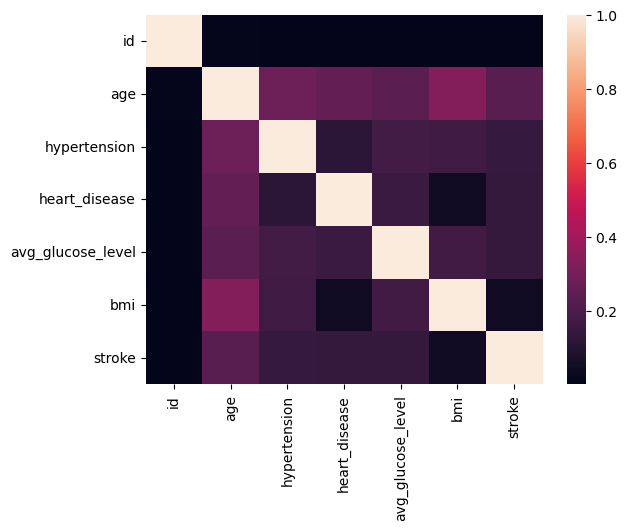

In [11]:
feature_corr = sns.heatmap(df.corr())

In [12]:
stroke_count = df.groupby("stroke")["stroke"].count()
stroke_count

stroke
0    4700
1     209
Name: stroke, dtype: int64

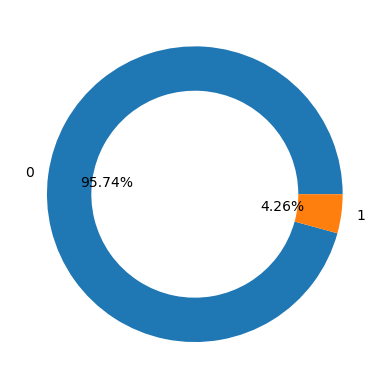

In [13]:
plt.pie(stroke_count, labels=stroke_count.index, autopct="%.2f%%", wedgeprops=dict(width=0.3))
plt.show()

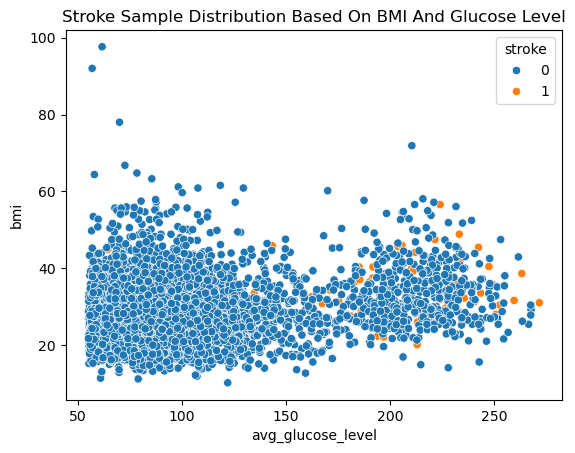

In [14]:
plt.title("Stroke Sample Distribution Based On BMI And Glucose Level")
sns.scatterplot(x=df["avg_glucose_level"], y=df["bmi"], hue=df["stroke"])
plt.show()

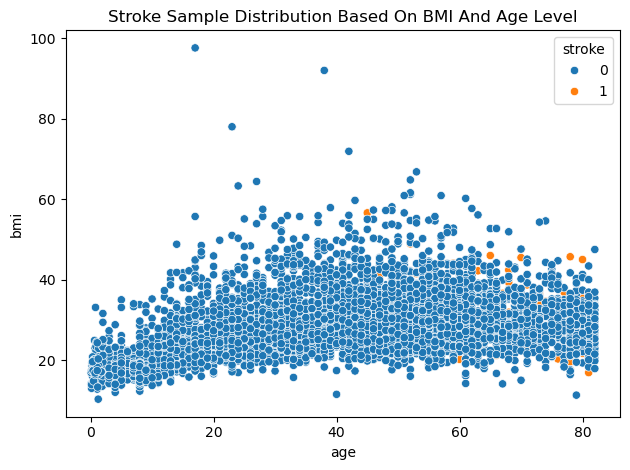

In [15]:
plt.title("Stroke Sample Distribution Based On BMI And Age Level")
sns.scatterplot(x=df["age"], y=df["bmi"], hue=df["stroke"])
plt.tight_layout()
plt.show()

##### Split train test dataset

In [16]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

X, y = make_blobs(1000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(800, 2) (200, 2) (800,) (200,)


In [17]:
parameters = ["gender", "age", "hypertension", "heart_disease","bmi","avg_glucose_level"]
target = "stroke"

In [18]:
def binarize_gender(val):
    if val == "Male":
        return 1
    else:
        return 0

In [19]:
df["gender"] = df["gender"].apply(binarize_gender)

In [20]:
model = DecisionTreeClassifier(max_depth=5)
model.fit(df[parameters], df[target])

DecisionTreeClassifier(max_depth=5)

In [21]:
model.score(df[parameters], df[target])

0.9590547973110614

In [22]:
clf = DecisionTreeClassifier(max_depth=2, random_state=0)

clf.fit(X_train, y_train)

clf.predict(X_test)

array([0, 1, 0, 1, 0, 2, 1, 1, 1, 2, 2, 2, 1, 0, 1, 0, 2, 2, 0, 0, 0, 0,
       2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 1, 1, 0,
       1, 0, 2, 0, 1, 2, 2, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 2, 1, 0, 1,
       1, 2, 0, 0, 0, 2, 0, 1, 1, 2, 0, 2, 2, 1, 1, 0, 0, 2, 2, 0, 2, 0,
       0, 2, 2, 1, 0, 0, 0, 0, 1, 2, 0, 2, 1, 2, 2, 1, 1, 0, 0, 1, 1, 0,
       1, 2, 1, 2, 0, 0, 2, 2, 0, 2, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1, 2, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 2, 0, 2, 2, 2, 0, 1, 0, 2, 0, 2,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 2, 0, 2, 2, 2, 0, 1, 2, 2, 1,
       0, 0, 2, 2, 2, 2, 1, 0, 0, 1, 2, 2, 1, 1, 1, 0, 1, 2, 2, 1, 2, 2,
       1, 1])

[Text(0.4, 0.8333333333333334, 'x[0] <= -3.589\ngini = 0.667\nsamples = 800\nvalue = [270, 269, 261]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 270\nvalue = [270, 0, 0]'),
 Text(0.6, 0.5, 'x[0] <= 4.368\ngini = 0.5\nsamples = 530\nvalue = [0, 269, 261]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 269\nvalue = [0, 269, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 261\nvalue = [0, 0, 261]')]

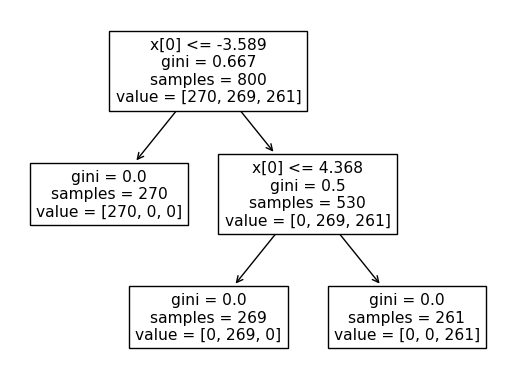

In [23]:
tree.plot_tree(clf)

[Text(0.5401785714285714, 0.9166666666666666, 'x[1] <= 67.5\ngini = 0.082\nsamples = 4909\nvalue = [4700, 209]'),
 Text(0.2857142857142857, 0.75, 'x[1] <= 47.5\ngini = 0.04\nsamples = 4118\nvalue = [4034, 84]'),
 Text(0.14285714285714285, 0.5833333333333334, 'x[1] <= 37.5\ngini = 0.01\nsamples = 2681\nvalue = [2668, 13]'),
 Text(0.07142857142857142, 0.4166666666666667, 'x[5] <= 57.935\ngini = 0.002\nsamples = 1975\nvalue = [1973, 2]'),
 Text(0.03571428571428571, 0.25, 'x[5] <= 57.925\ngini = 0.038\nsamples = 52\nvalue = [51, 1]'),
 Text(0.017857142857142856, 0.08333333333333333, 'gini = 0.0\nsamples = 51\nvalue = [51, 0]'),
 Text(0.05357142857142857, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.10714285714285714, 0.25, 'x[1] <= 31.5\ngini = 0.001\nsamples = 1923\nvalue = [1922, 1]'),
 Text(0.08928571428571429, 0.08333333333333333, 'gini = 0.0\nsamples = 1568\nvalue = [1568, 0]'),
 Text(0.125, 0.08333333333333333, 'gini = 0.006\nsamples = 355\nvalue = [354, 1

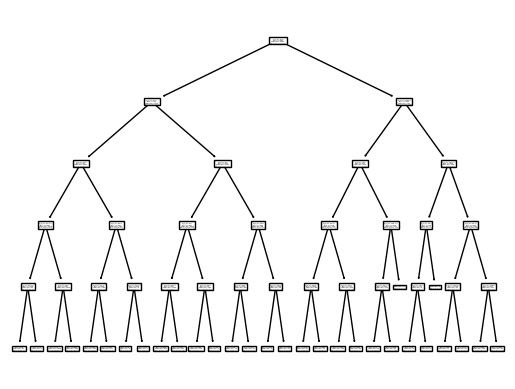

In [24]:
tree.plot_tree(model)

In [25]:
list(zip(parameters, model.feature_importances_))

[('gender', 0.0),
 ('age', 0.5146865510068098),
 ('hypertension', 0.012477576043655484),
 ('heart_disease', 0.021878045946516458),
 ('bmi', 0.1940512810817829),
 ('avg_glucose_level', 0.2569065459212354)]